In [1]:
from functions_load import load_and_process

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=load_and_process('C:\\Users\\mehdi\\data301\\course-project-solo_506-1\\data\\raw\\Data.csv')

C:\Users\mehdi\miniconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\mehdi\miniconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\mehdi\miniconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [5]:
df

,cps19_religion,cps19_province,cps19_yob,cps19_employment,cps19_gender,cps19_education,cps19_imm,cps19_bornin_canada,cps19_econ_retro,cps19_own_fin_retro,pes19_votechoice2019,pes19_nativism1,pes19_nativism5,pes19_immigjobs,age
82,Orthodox,Ontario,72,Working for pay full-time,Female,Master degree,About the same number of immigrants as now,Canadian,Stayed about the same,2,Liberal,Somewhat disagree,Strongly disagree,Somewhat disagree,28
83,Atheist,British Columbia,41,Retired,Male,Bachelor degree,Fewer immigrants,Canadian,Got worse,2,Conservative,Somewhat agree,Strongly disagree,Strongly disagree,59
88,Atheist,Alberta,35,Retired,Male,Bachelor degree,More immigrants,Canadian,Got worse,2,Conservative,Neither agree nor disagree,Strongly disagree,Strongly disagree,65
114,Pentecostal/ Fundamentalist/ Born Again/ Evang...,Newfoundland and Labrador,36,Working for pay part-time,Female,Completed technical,Fewer immigrants,Canadian,Got worse,2,Conservative,Strongly agree,Somewhat agree,Somewhat agree,64
143,United Church of Canada,Ontario,46,Working for pay full-time,Female,Bachelor degree,Fewer immigrants,Canadian,Got better,1,Liberal,Somewhat agree,Somewhat disagree,Somewhat disagree,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37803,Catholic,New Brunswick,78,Student,Female,Some university,More immigrants,Canadian,Stayed about the same,3,Green Party,Somewhat disagree,Somewhat disagree,Somewhat disagree,22
37808,Catholic,Newfoundland and Labrador,50,Working for pay full-time,Male,Bachelor degree,Fewer immigrants,Canadian,Stayed about the same,2,Liberal,Strongly agree,Neither agree nor disagree,Somewhat agree,50
37810,Protestant,Ontario,25,Working for pay full-time,Male,Some technical,Fewer immigrants,Canadian,Stayed about the same,2,NDP,Somewhat disagree,Neither agree nor disagree,Neither agree nor disagree,75
37815,Atheist,Quebec,38,Working for pay full-time,Male,Some university,About the same number of immigrants as now,Canadian,Got better,2,Bloc Québécois,Somewhat agree,Strongly disagree,Strongly disagree,62


In [5]:
import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof

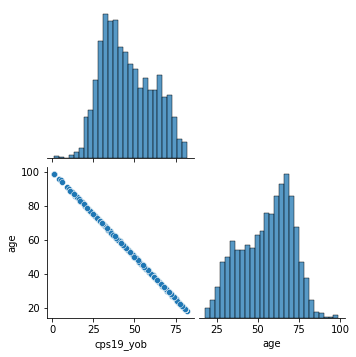

In [8]:
sns.pairplot(df,corner=True)

<AxesSubplot:xlabel='age', ylabel='pes19_votechoice2019'>

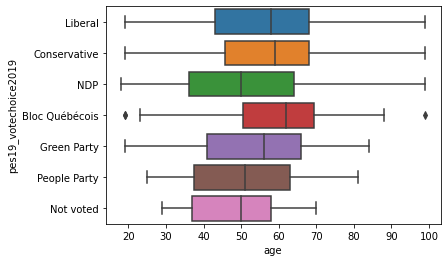

In [8]:
sns.boxplot(x='age',y='pes19_votechoice2019',data=df)

In [13]:
sns.barplot(x='cps19_gender',y='cps19_imm',data=df,kind="count")

TypeError: Neither the `x` nor `y` variable appears to be numeric.

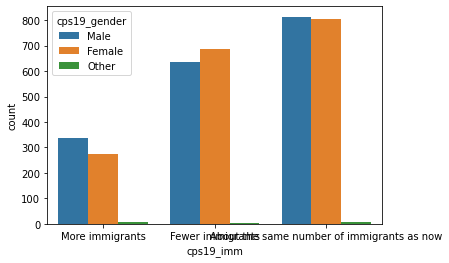

In [18]:
d1=sns.countplot(x='cps19_imm',data=df,hue="cps19_gender")

<AxesSubplot:xlabel='cps19_gender', ylabel='count'>

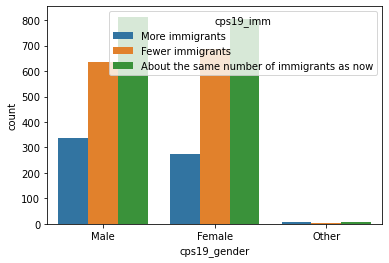

In [19]:
sns.countplot(x='cps19_gender',data=df,hue="cps19_imm",)

<AxesSubplot:xlabel='cps19_province', ylabel='count'>

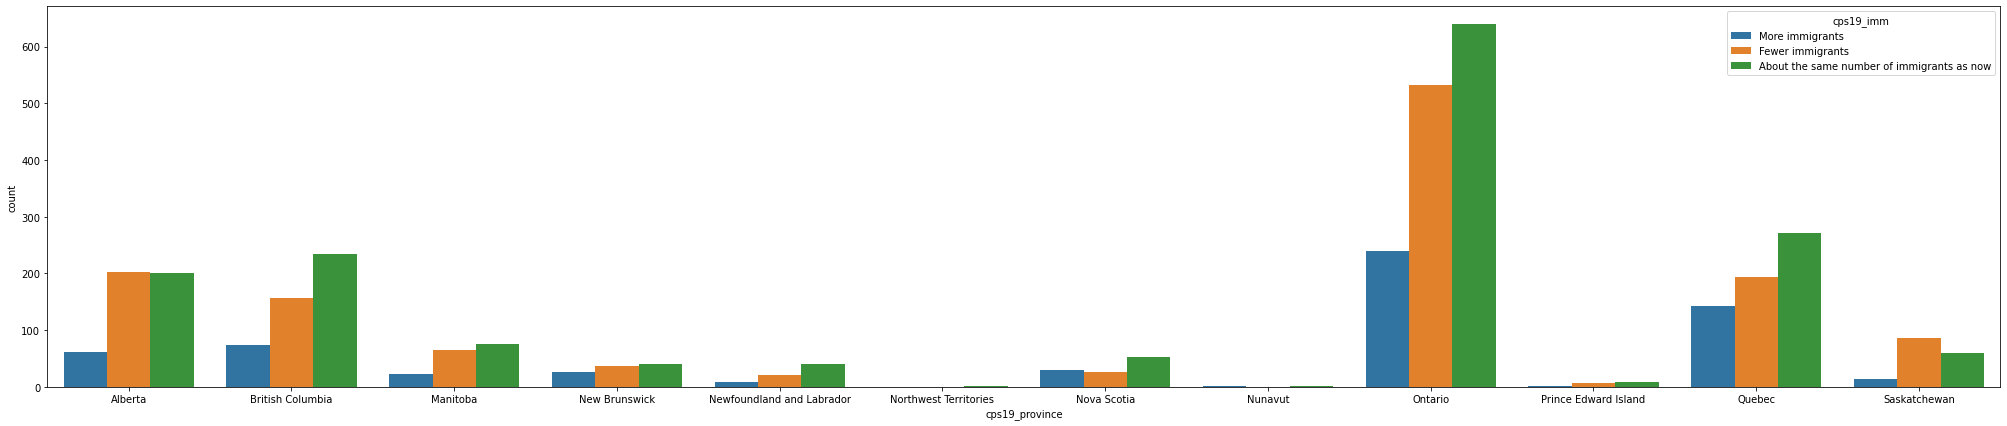

In [30]:
sns.countplot(x='cps19_province',data=df,hue="cps19_imm")

AttributeError: 'FacetGrid' object has no attribute 'set_figwidth'

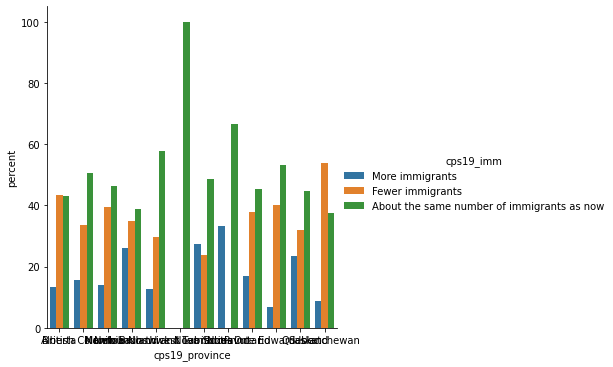

In [45]:
x,y = 'cps19_province', 'cps19_imm'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


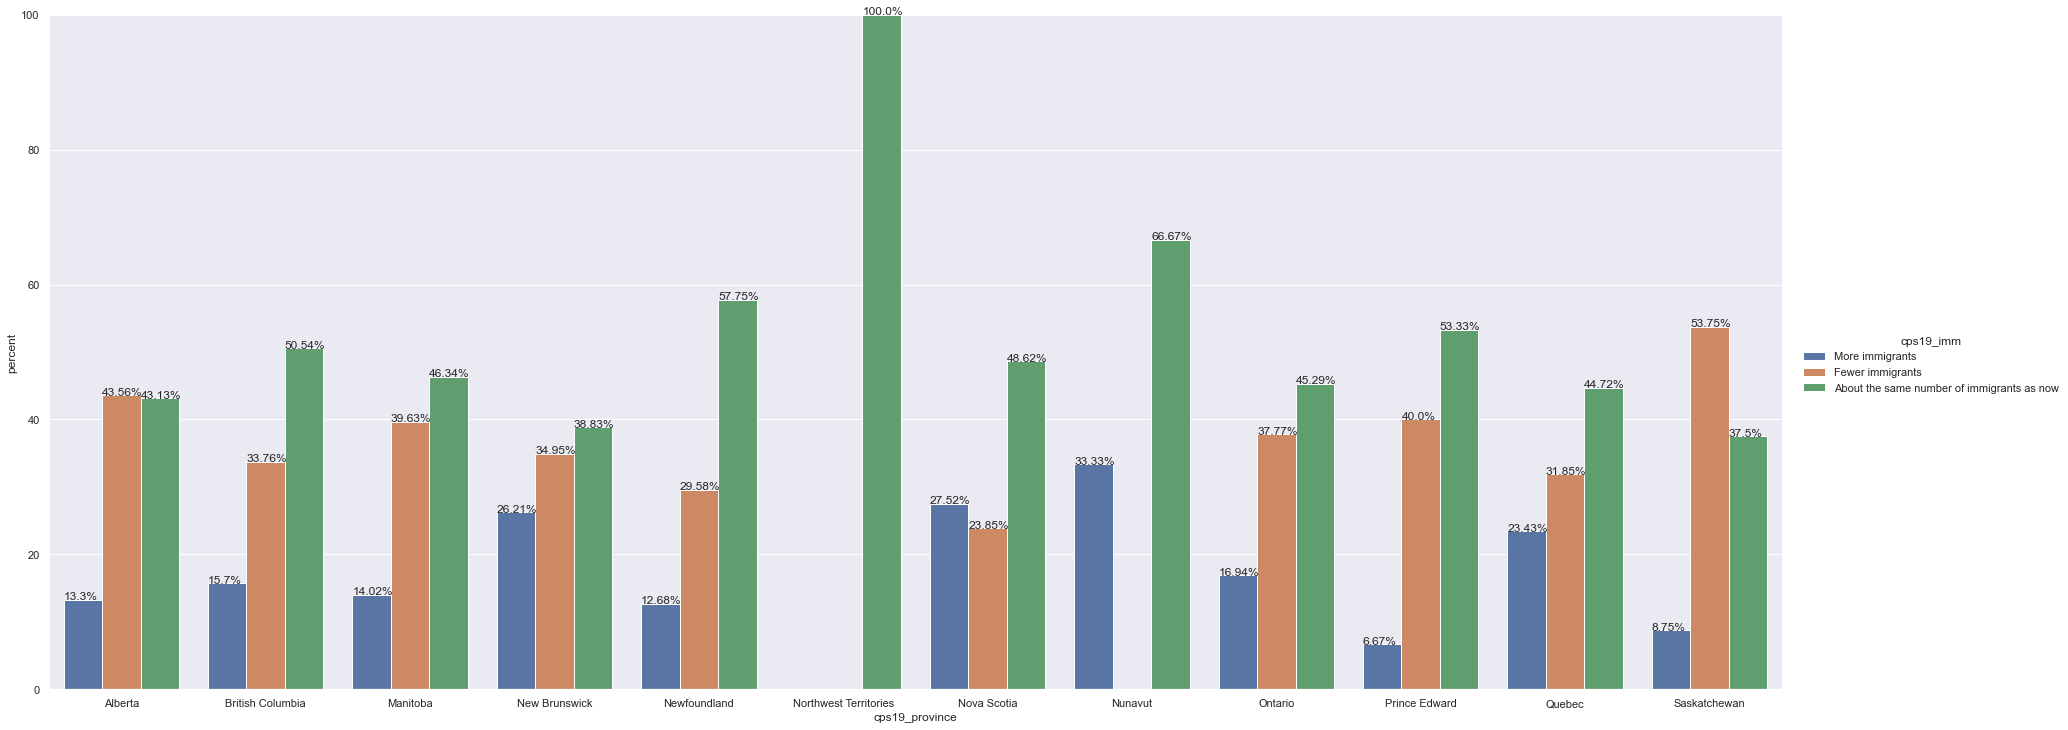

In [7]:
x,y = 'cps19_province', 'cps19_imm'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=10,aspect=2.5)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


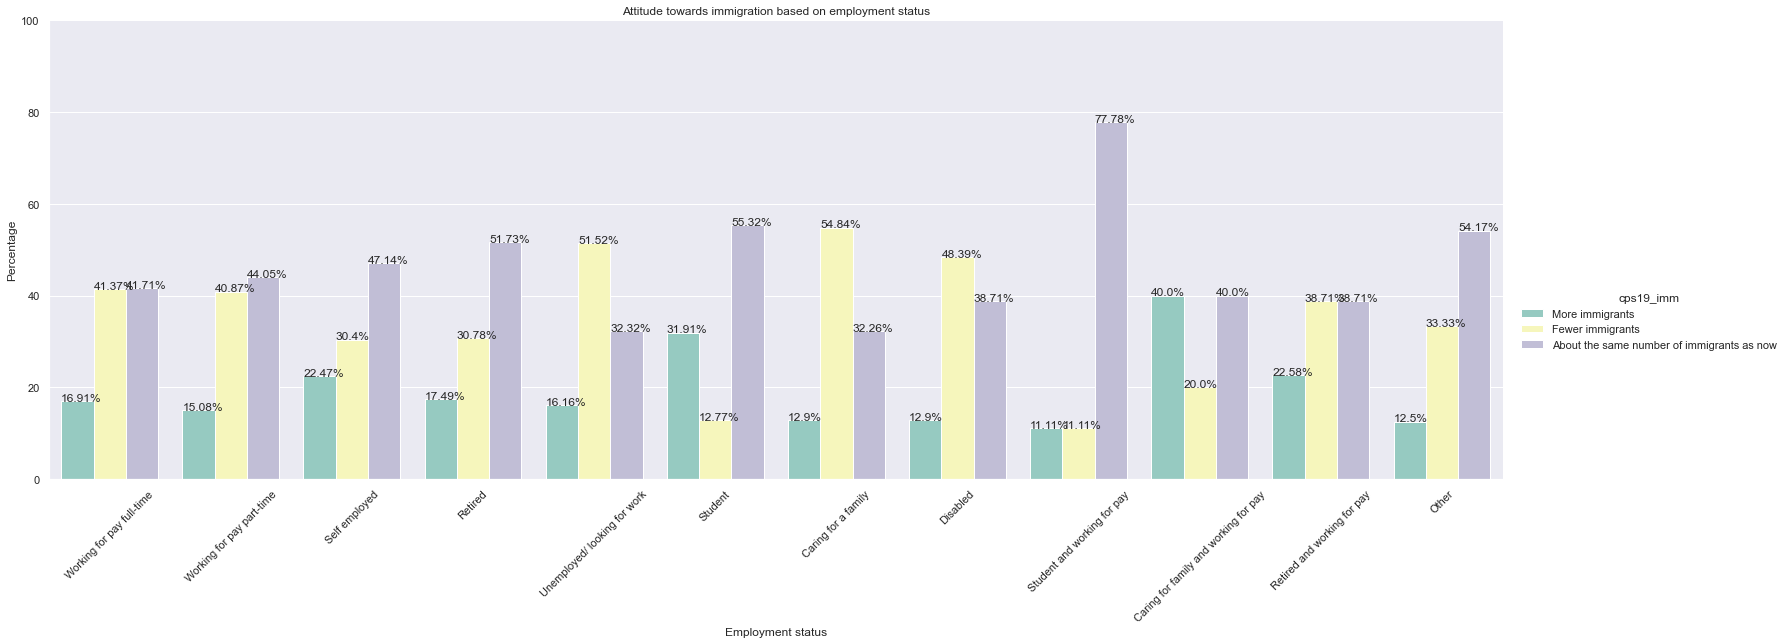

In [43]:
x,y = 'cps19_employment', 'cps19_imm'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()
g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,height=7,aspect=3,palette="Set3")
g.ax.set_ylim(0,100)
plt.title('Attitude towards immigration based on employment status')
plt.xlabel("Employment status")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


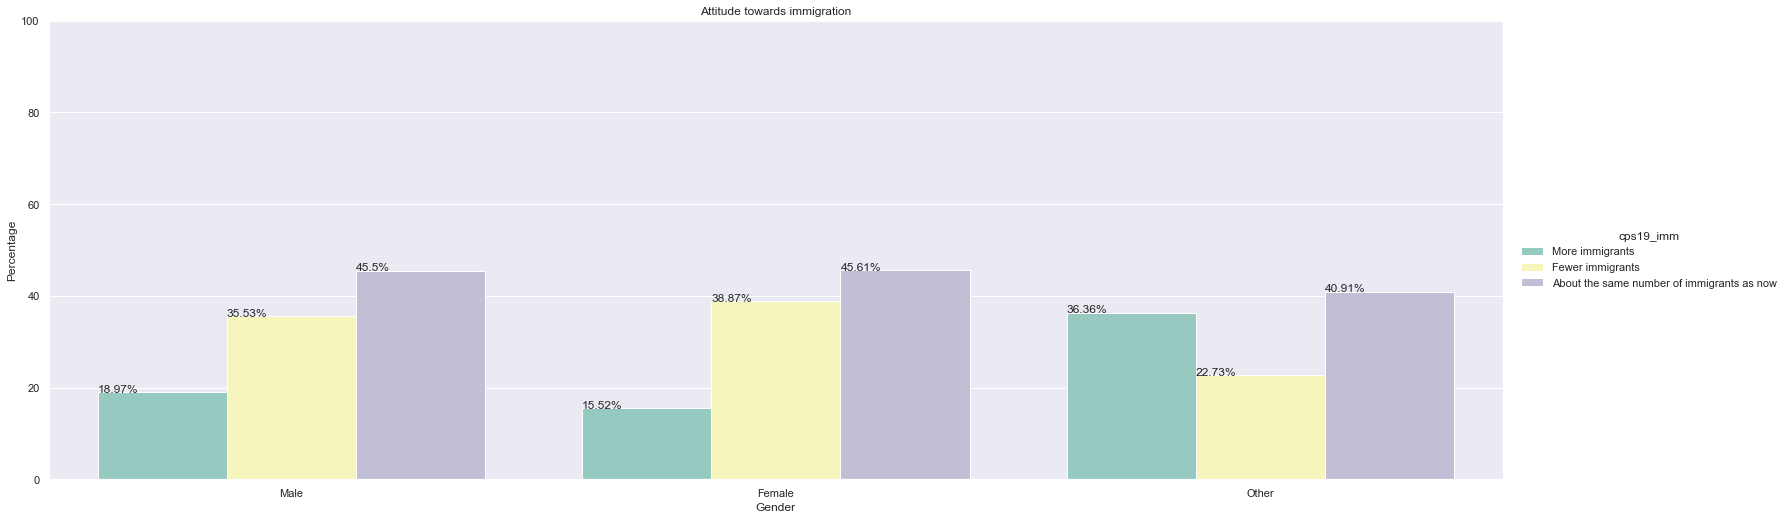

In [46]:
x,y = 'cps19_gender', 'cps19_imm'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()
g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,height=7,aspect=3,palette="Set3")
g.ax.set_ylim(0,100)
plt.title('Attitude towards immigration')
plt.xlabel("Gender")
plt.ylabel("Percentage")
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

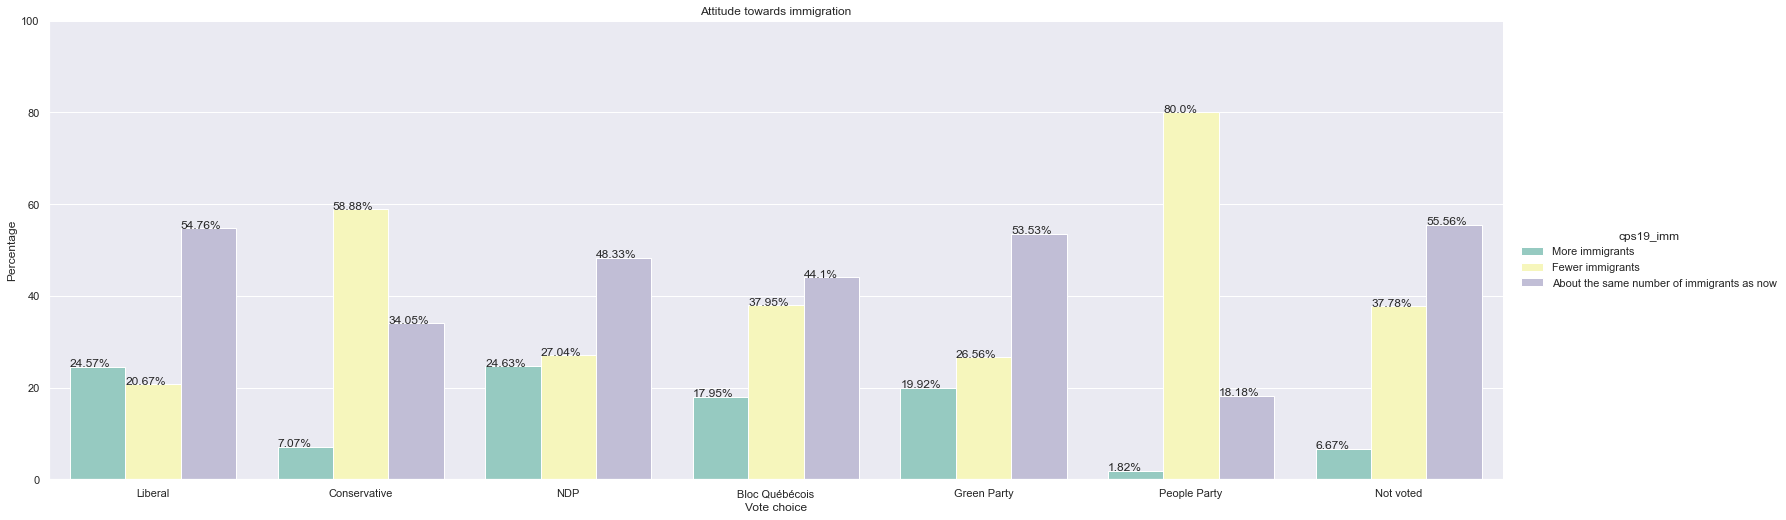

In [47]:
x,y = 'pes19_votechoice2019', 'cps19_imm'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()
g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,height=7,aspect=3,palette="Set3")
g.ax.set_ylim(0,100)
plt.title('Attitude towards immigration')
plt.xlabel("Vote choice")
plt.ylabel("Percentage")
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [59]:
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols


In [70]:
model = ols('attitude ~C(pes19_votechoice2019) + C(cps19_employment)', data=df)

In [71]:
fitted_model = model.fit()
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               attitude   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     35.37
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          2.03e-107
Time:                        17:25:19   Log-Likelihood:                -3574.3
No. Observations:                3574   AIC:                             7185.
Df Residuals:                    3556   BIC:                             7296.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        1.9889      0.023     87.704      0.000       1.944       2.033
C(pes19_votechoice2019)[T.Conservative]                         -0.5566      0.026    -21.019      0.000      -0.609      -0.505
C(pes19_votechoice2019)[T.NDP]                                  -0.0540      0.034     -1.589      0.112      -0.121       0.013
C(pes19_votechoice2019)[T.Bloc Québécois]                       -0.2547      0.051     -5.008      0.000      -0.354      -0.155
C(pes19_votechoice2019)[T.Green Party]                          -0.1059      0.046     -2.280      0.023      -0.197      -0.015
C(pes19_votechoice2019)[T.People Party]                         -0.7852      0.091     -8.618      0.000      -0.964      -0.607
C(pes19_votechoice2019)[T.Not voted]                            -0.3102      0.100     -3.088      0.002      -0.507      -0.113
C(cps19_employment)[T.Working for pay part-time]                -0.0426      0.045     -0.947      0.344      -0.131       0.046
C(cps19_employment)[T.Self employed]                             0.1720      0.047      3.654      0.000       0.080       0.264
C(cps19_employment)[T.Retired]                                   0.1187      0.025      4.658      0.000       0.069       0.169
C(cps19_employment)[T.Unemployed/ looking for work]             -0.0408      0.069     -0.595      0.552      -0.175       0.094
C(cps19_employment)[T.Student]                                   0.3054      0.098      3.118      0.002       0.113       0.498
C(cps19_employment)[T.Caring for a family]                      -0.1036      0.086     -1.209      0.227      -0.272       0.064
C(cps19_employment)[T.Disabled]                                 -0.1462      0.071     -2.070      0.039      -0.285      -0.008
C(cps19_employment)[T.Student and working for pay]               0.3383      0.221      1.533      0.125      -0.094       0.771
C(cps19_employment)[T.Caring for family and working for pay]     0.2538      0.296      0.859      0.391      -0.326       0.833
C(cps19_employment)[T.Retired and working for pay]               0.1172      0.120      0.976      0.329      -0.118       0.353
C(cps19_employment)[T.Other]                                    -0.0373      0.136     -0.274      0.784      -0.304       0.229
==============================================================================
Omnibus:                      183.163   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.467
Skew:                           0.319   Prob(JB):                     3.11e-26
Kurtosis:                       2.382   Cond. No.         

In [68]:
df.loc[df['cps19_imm']=="Fewer immigrants",'attitude']=1
df.loc[df['cps19_imm']=="About the same number of immigrants as now",'attitude']=2
df.loc[df['cps19_imm']=="More immigrants",'attitude']=3

In [69]:
df['attitude']

82       2.0
83       1.0
88       3.0
114      1.0
143      1.0
        ... 
37803    3.0
37808    1.0
37810    1.0
37815    2.0
37817    3.0
Name: attitude, Length: 3574, dtype: float64